# Lista de Ajuste de Dados

* Aluno : Gabriel Wendell Celestino Rocha
* Matrícula :  20190112149 

* Disciplina : Física Computacional II
* Professor : Leonardo Machado
* Data de Entrega : 16/04/2021

In [1]:
import matplotlib.pyplot as plt
import scipy.optimize as opt
import pandas as pd
import numpy as np

%matplotlib notebook

## Ajuste de dados usando o `scipy.optimize`

### Letra a)

Vamos começar lendo os dados contidos no arquivo `decay.data`:

In [2]:
decay = pd.read_csv('decay.data', sep='\s+', header=None)
decay

,0,1
0,5,32
1,15,17
2,25,21
3,35,7
4,45,8
5,55,6
6,65,5
7,75,2
8,85,3
9,95,1


Vamos ler os dados usando o Numpy também:

In [3]:
decay_ = np.loadtxt('decay.data')
decay_

array([[  5.,  32.],
       [ 15.,  17.],
       [ 25.,  21.],
       [ 35.,   7.],
       [ 45.,   8.],
       [ 55.,   6.],
       [ 65.,   5.],
       [ 75.,   2.],
       [ 85.,   3.],
       [ 95.,   1.],
       [105.,   4.],
       [115.,   1.]])

### Letra b)

Vamos definir uma função que segue o modelo abaixo no qual iremos usar no `curve_fit`:

$$\boxed{y=a\cdot e^{-bx}}$$

In [4]:
def func(x,a,b):
    return a*np.exp(-b*x)

### Letra c)

Agora vamos realizar o ajuste:

In [5]:
param, pconv = opt.curve_fit(func,np.array(decay[0]), np.array(decay[1]))

c:\users\gabriel wendell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


### Letra d)

Vamos agora realizar um gráfico plotando o modelo proposto com os dados experimentais. Como de costume, começamos definindo uma função para melhorar a estética dos plots:

In [6]:
def opt_plot():
    plt.grid(True, linestyle=":", color='0.50')
    plt.minorticks_on()
    plt.tick_params(axis='both', which='minor', direction='in', top=True, right=True, length=5, width=1, labelsize=15)
    plt.tick_params(axis='both', which='major', direction='in', top=True, right=True, length=8, width=1, labelsize=15)

Definimos algumas variáveis de controle:

In [7]:
n = 1 
x = np.arange(0,120+n,n)

Vamos agora plotar o modelo proposto juntamente com os dados experimentais:

<IPython.core.display.Javascript object>


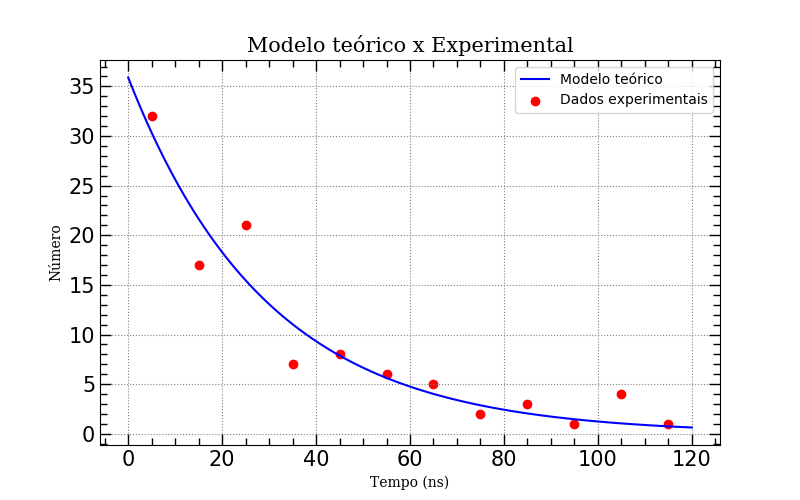

In [8]:
plt.figure(figsize=(8,5))

plt.plot(x, func(x, param[0], param[1]), color='blue', label='Modelo teórico')
plt.scatter(decay[0],decay[1], color='red', label='Dados experimentais')
plt.title('Modelo teórico x Experimental', fontsize=15, family='serif')
plt.xlabel('Tempo (ns)', fontsize=10, family='serif')
plt.ylabel('Número', fontsize=10, family='serif')
plt.legend(loc='best')
opt_plot()

Note que o modelo proposto se adequa relativamente bem aos dados experimentais uma vez que o nosso modelo teórico não leva em consideração fontes que são causadores de ruídos experimentais.

Vamos agora determinar o $R^{2}$ de nosso ajuste. Primeiramente, sendo $f(x_{i})$ uma função analítica avaliada num ponto $x_{i}$ qualquer e $y_{i}$ o valor experimental nesse ponto $x_{i}$, temos que $R$ será definido por:

$$\boxed{R=y_{i}-f(x_{i})}$$

Calculando os valores de $R$ em cada ponto:

In [9]:
N = len(decay[0])
R = np.zeros(N)

for i in range(N):
    R[i] = (decay_[i,1] - func(decay_[i,0], param[0], param[1]))**2

Agora vamos printar nosso resultado:

In [10]:
print('R =',R)

R = [2.78373751e+00 2.16622276e+01 3.06982871e+01 1.62954168e+01
 1.45558637e-02 1.40460052e-01 9.68350641e-01 7.51801217e-01
 9.08490697e-01 2.12785568e-01 8.74242628e+00 6.51324711e-02]


### Letra e)

Sabe-se que a vida média de um píon (nesse caso) vai ser dado por $1/b$, ou seja:

In [11]:
t = 1/param[1]

print('Vida média =', t, 's')

Vida média = 29.674854146824625 s


Sendo $26$ $\text{ns}$ o valor experimental da vida média de um píon, temos que o valor obtido pelo nosso ajuste possui ruído que faz o valor calculado a partir do modelo diverge do valor experimental. Entretanto, note que essa divergência não é muito grande, ou seja, nosso modelo fornece um ajuste razoável para uma primeira aproximação.

## Regressão linear e o método dos mínimos quadráticos

### Letra a)

Vamos calcular os logaritmos dos dados contidos no arquivo `decay.data`:

In [12]:
log = np.log(decay[1])
log

0     3.465736
1     2.833213
2     3.044522
3     1.945910
4     2.079442
5     1.791759
6     1.609438
7     0.693147
8     1.098612
9     0.000000
10    1.386294
11    0.000000
Name: 1, dtype: float64

### Letra b)

Vamos plotar um gráfico $\log{(yd)}$ vs $t$:

<IPython.core.display.Javascript object>


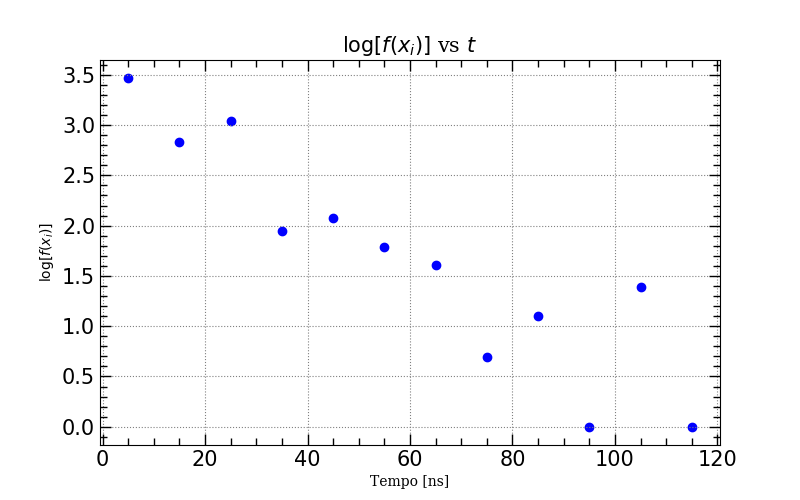

In [13]:
plt.figure(figsize=(8,5))

plt.scatter(decay[0], log, color='blue')
plt.title(r'$\log{[f(x_{i})]}$ vs $t$', fontsize=15, family='serif')
plt.xlabel('Tempo [ns]', fontsize=10, family='serif')
plt.ylabel(r'$\log{[f(x_{i})]}$', fontsize=10, family='serif')
opt_plot()

Com base no gráfico acima, a dependência aparenta ser linear até os pontos em torno de $100,150$ $\text{ns}$ que é a região com maior intensidade de ruído.

### Letra c)

Sabe-se que os parâmetros da reta $f(x)=a+mx$, onde $a=\overline{y}-m\overline{x}$, que minimiza os resíduos quadráticos podem ser determinados baseados na fórmula abaixo:

$$\boxed{m=\frac{\sum_{i}x_{i}(y_{i}-\overline{y})}{\sum_{i}x_{i}(x_{i}-\overline{x})}}$$

Podemos implementar essa fórmula computacionalmente da seguinte forma:

In [14]:
a = 0
b = 0

med_x = np.mean(decay[0])
med_y = np.mean(log)

for i in range(len(decay[0])):
    a += decay_[i,0]*(log[i] - med_y)
    b += decay_[i,0]*(decay_[i,0] - med_x)
    
m = a/b

Dessa forma, temos então que o parâmetro $a$ será:

In [15]:
a = med_y - m*med_x
a

3.362368572371219

### Letra d)

Vamos aplicar os parâmetros que minimizam os resíduos quadráticos dos dados:

In [16]:
x_ = np.arange(decay_[0,0], decay_[len(decay[0]) - 1,0], 1)

def f(x):
    return a+m*x

Por fim, vamos ao plot:

<IPython.core.display.Javascript object>


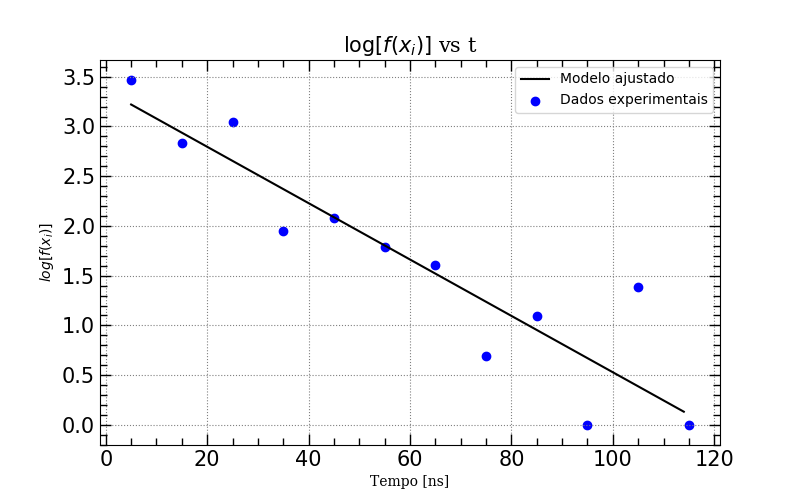

In [17]:
plt.figure(figsize=(8,5))

plt.plot(x_,f(x_), color='black', label='Modelo ajustado')
plt.scatter(decay[0],log, color='blue', label='Dados experimentais')
plt.title(r'$\log{[f(x_i)]}$ vs t', fontsize=15, family='serif')
plt.ylabel("$log[f(x_i)]$", fontsize=10, family='serif')
plt.xlabel("Tempo [ns]", fontsize=10, family='serif')
plt.legend(loc='best')
opt_plot()

Sendo $\tau=1/b$ o tempo de vida média, temos que $\tau$ pode ser estimado a partir do coeficiente da reta dado por:

$$\boxed{b=-\frac{\log{[f(x_{n})]}-\log{[f(x_{0})]}}{x_{n}-x_{0}}}$$

Note que a função $f(x_{i})$ engloba todos os valores de $x_{i}$ contidos no domínio $-bx_{i}+\log{[f(0)]}$. Além disso, $x_{n}$ é o último ponto contido no domínio em questão. Dessa forma, podemos estimar o $\tau$ computacionalmente da seguinte forma:

In [18]:
b = -(np.log(f(decay_[len(decay[0]) - 1,0])) - np.log(decay_[0,0]))/(decay_[len(decay[0]) - 1,0] - decay_[0,0])
tau = 1/b

Agora vamos printar o valor de $\tau$:

In [19]:
print('t =', tau, 'ns')

t = 28.401767760634336 ns


Apesar de ainda estar divergindo do valor experimental $(26\text{ ns})$, ele está mais próximo do valor experimental do que na estimativa obtida na primeira parte da lista. Logo, conseguimos uma estimativa um pouco melhor que a anterior.

## Ajuste de dados e erro experimental

### Letra a)

Vamos começar lendo os dados contidos no arquivo `scattering.data`:

In [20]:
scattering = pd.read_csv('scattering.data', sep='\s+', header=None)
scattering

,0,1,2
0,0,10.60,9.34
1,25,16.00,17.90
2,50,45.00,41.50
3,75,83.50,85.50
4,100,52.80,51.50
5,125,19.90,21.50
6,150,10.80,10.80
7,170,8.25,6.29
8,200,4.70,4.14


Vamos ler os dados usando o Numpy também:

In [21]:
scattering_ = np.loadtxt('scattering.data')
scattering_

array([[  0.  ,  10.6 ,   9.34],
       [ 25.  ,  16.  ,  17.9 ],
       [ 50.  ,  45.  ,  41.5 ],
       [ 75.  ,  83.5 ,  85.5 ],
       [100.  ,  52.8 ,  51.5 ],
       [125.  ,  19.9 ,  21.5 ],
       [150.  ,  10.8 ,  10.8 ],
       [170.  ,   8.25,   6.29],
       [200.  ,   4.7 ,   4.14]])

### Letra b)

Sabe-se que a seção transversal para o espalhamento de nêutrons por um núcleo depende da energia dos nêutrons da seguinte forma:

$$f(E)=\frac{f_{r}}{(E-E_{r})^{2}+\Gamma^{2}/4}$$

Para uma primeira análise, vamos desconsiderar ruídos experimentais e vamos determinar os valores de $f_{r}$, $E_{r}$ e $\Gamma$:

In [22]:
def f(E,fr,Er,Gamma):
    return fr/((E-Er)**2 + (Gamma/2)**2)

Analogamente ao que foi feito na primeira parte dessa lista:

In [23]:
param, pconv = opt.curve_fit(f, scattering[0], scattering[1])

Definimos nosso eixo auxiliar:

In [24]:
x_ = np.arange(scattering_[0,0], scattering_[len(scattering[0]) - 1,0], 1)

Por fim, vamos ao plot:

<IPython.core.display.Javascript object>


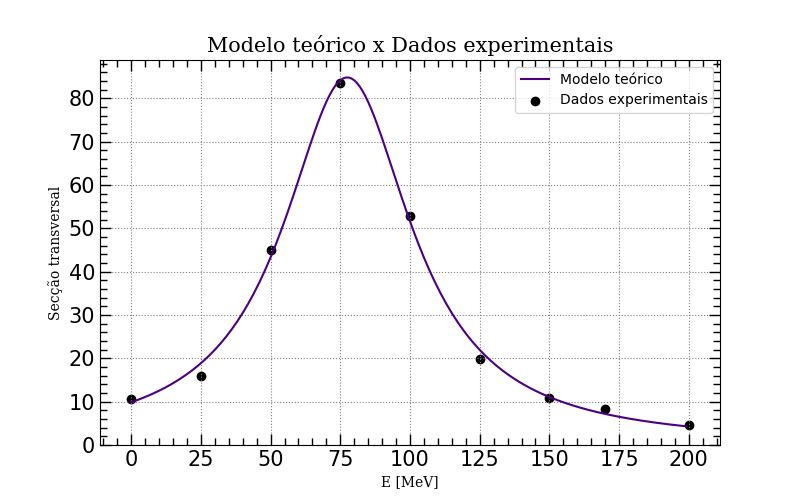

In [25]:
plt.figure(figsize=(8,5))

plt.plot(x_,f(x_,param[0],param[1],param[2]), color='indigo', label='Modelo teórico')
plt.scatter(scattering[0], scattering[1], color='black', label='Dados experimentais')
plt.title('Modelo teórico x Dados experimentais', fontsize=15, family='serif')
plt.xlabel('E [MeV]', fontsize=10, family='serif')
plt.ylabel('Secção transversal', fontsize=10, family='serif')
plt.legend(loc='best')
opt_plot()

Vamos printar os parâmetros $f_{r}$, $E_{r}$ e $\Gamma$:

In [26]:
print('fr =', param[0])
print('Er =', param[1], 'MeV')
print('Gamma =', param[2], 'MeV')

fr = 66730.42111203661
Er = 77.48839586254822 MeV
Gamma = -56.09962690343376 MeV


Sendo os valores $E_{r}=78$ $\text{MeV}$ e $\Gamma=55$ $\text{MeV}$ os valores previstos pela teoria, temos que os dados calculados computacionalmente estão bem próximos dos valores previstos teoricamente.

### Letra c)

Vamos agora plotar um gráfico contendo as barras de erros. Começamos definindo nosso eixo $x$:

In [27]:
x = np.arange(scattering_[0,0], scattering_[len(scattering[0]) - 1,0], 1)

Por fim, vamos ao plot (com as barras de erro):

<IPython.core.display.Javascript object>


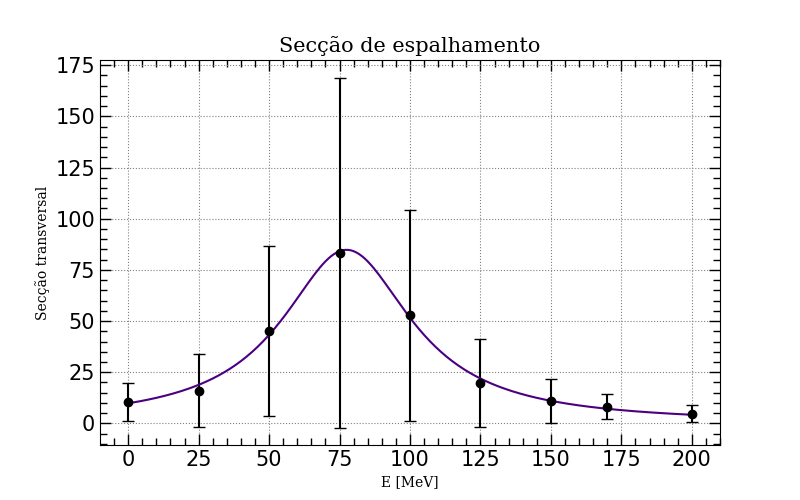

In [28]:
plt.figure(figsize=(8,5))

plt.plot(x, f(x,param[0],param[1],param[2]), color='indigo')
plt.errorbar(scattering[0], scattering[1], yerr=scattering[2], fmt='o', capsize=4, color='black')
plt.title('Secção de espalhamento', fontsize=15, family='serif')
plt.xlabel('E [MeV]', fontsize=10, family='serif')
plt.ylabel('Secção transversal', fontsize=10, family='serif')
opt_plot()

Note que o tamanho da barra de erro é bem maior entre valores cuja secção transversal é maior de forma que a barra atinge valores negativos para a secção transversal. Com exceção dessa região, temos que o tamanho das barras de erro nas outras regiões aparentam ser consistente com o gráfico em questão uma vez que o erro aumenta de forma diretamente proporcional com a secção transversal.

Além disso, o erro calculado nos permite extrair a **confiabilidade** dos dados, e dessa forma, aplicar pesos nos mesmos com o intuito de estimar um comportamente que se adeque melhor aos valores.

### Letra e)

Vamos agora incluir os erros como pesos durante o ajuste. Começamos de forma análoga ao que foi feito anteriormente:

In [29]:
param, pconv = opt.curve_fit(f, scattering[0], scattering[1], sigma=scattering[2])

Definimos nosso eixo $x$:

In [30]:
x_ = np.arange(scattering_[0,0], scattering_[len(scattering[0]) - 1,0], 1)

Finalmente, vamos ao plot:

<IPython.core.display.Javascript object>


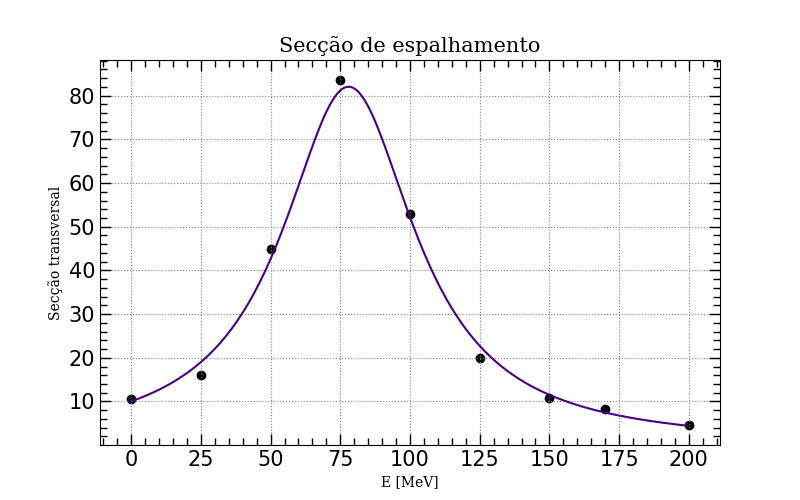

In [31]:
plt.figure(figsize=(8,5))

plt.plot(x_,f(x_,param[0],param[1],param[2]), color='indigo')
plt.scatter(scattering[0], scattering[1], color='black')
plt.title('Secção de espalhamento', fontsize=15, family='serif')
plt.xlabel('E [MeV]', fontsize=10, family='serif')
plt.ylabel('Secção transversal', fontsize=10, family='serif')
opt_plot()

De posse dos novos dados ajustados de acordo com os pesos baseados nos erros, podemos obter novas estimativas para os parâmetros $\Gamma$ e $E_{r}$:

In [32]:
print('fr =', param[0])
print('Er =', param[1], 'MeV')
print('Gamma =', param[2], 'MeV')

fr = 69431.57858610728
Er = 77.9925659424655 MeV
Gamma = 58.17657545963292 MeV


Note que ainda temos um certo ruído atrelado em nossos valores, principalmente com relação ao parâmtro $Gamma$. Entretanto, note que nossa estimativa está muito melhor que as estimativas anteriores. O parâmetro $E_{r}$ basicamente coincide (no limite) com o valor esperado. Dessa forma, atribuir pesos aos erros nos forneceu a melhor estimativa até o momento.

$\blacksquare$